# Python: regulation

This notebook programs the graphical approach to regulation. We follow the notation in the regulation lecture.

So we have a public project with value $S$ to society. Cost of the firm doing this project is given by $C=\beta -e$ where $\beta$ either equals $\beta^l > 0$ or $\beta^h>\beta^l$.

By investing effort $e$ the firm can reduce the costs of the project. For the graphs we use a quadratic effort cost function $\psi(e) = 0.5e^2$ and $\beta^h = 3.0, \beta^l = 2.5$. 

The planner pays the firm a transfer equal to $T=C+t$ at cost (to the planner) equal to $(1+\lambda)T$ with $\lambda \geq 0$. 

We import the libraries that we need below.

In [2]:
from scipy import optimize,arange
from numpy import array, linspace
import matplotlib.pyplot as plt
%matplotlib inline

First, we replicate the figure in the exercise. An indifference curve in $(C,t)$ space takes the form $u = t -\psi(e) = \bar u$ for some value $\bar u \geq 0$. Hence, we get $t = \bar u + \psi(\beta - C)$. We draw these indifference curves for $\bar u =0$; that is, the curves correspond to the IR constraints.

The first best contract features $e^*$ that minimizes total costs $\beta - e + \psi(e)$: $\psi'(e^*) = 1$. Hence, we have $\psi'(\beta-C)=1$. With the quadratic $\psi$ function that we have chosen, this yields $\beta - C =1$ or equivalently $C = \beta -1$.

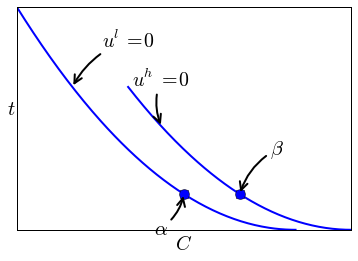

In [5]:
beta_h = 3
beta_l = 2.5

def psi(C,beta):
        return 0.5*(beta-C)**2

rangeCh = linspace(1.0,3,200)
rangeCl = linspace(0.0,2.5,200)
plt.clf()
plt.rcParams.update({'axes.labelsize': 20,'text.fontsize': 20, 'legend.fontsize': 20})
plt.xlabel(r"$C$",fontsize = 20)
plt.ylabel(r"$t$",fontsize = 20,rotation = 0)
IRh = [psi(C,beta_h) for C in rangeCh] # this plots the indifference curve t = psi(beta-C) for beta^h
IRl = [psi(C,beta_l) for C in rangeCl] # here the indifference curve for beta^l
plt.plot(rangeCh,IRh,'-', color = 'b', linewidth = 2)
plt.plot(rangeCl,IRl,'-', color = 'b', linewidth = 2)
plt.xticks((),[]) # we don't need "ticks" on the axes
plt.yticks((),[])
alpha_point = plt.plot(1.5,psi(1.5,beta_l), 'ro') # here we mark the first best contract for beta^l on the IR constraint
plt.setp(alpha_point, 'markersize', 10)           # C = 2.5 - 1 = 1.5
plt.setp(alpha_point, 'markerfacecolor', 'b')
beta_point = plt.plot(2,psi(2,beta_h), 'ro')      # and for beta^h: C = 3 - 1 = 2
plt.setp(beta_point, 'markersize', 10)
plt.setp(beta_point, 'markerfacecolor', 'b')



plt.annotate('$\\alpha$', xy=(1.5,psi(1.5,beta_l)),  xycoords='data', # here we define the labels and arrows in the graph
              xytext=(-30, -40), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )
plt.annotate('$u^l = 0$', xy=(0.5,psi(0.5,beta_l)),  xycoords='data',
              xytext=(30, 40), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )
plt.annotate('$\\beta$', xy=(2, psi(2,beta_h)),  xycoords='data',
              xytext=(30, 40), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )
plt.annotate('$u^h = 0$', xy=(1.3, psi(1.3,beta_h)),  xycoords='data',
              xytext=(-30, 40), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )
plt.savefig('Regulation_fig1.png')


a Indifference curves are of the form $t = \bar u + \psi(\beta - C)$. Hence, 

$$
\frac{dt}{dC} = -\psi'(\beta - C) < 0
$$

because $\psi' > 0$. In words, indifference curves are downward sloping.

To see how steepness varies with $\beta$, we consider the second derivative:

$$
\frac{d^2t}{dCd\beta} = -\psi''(\beta - C) < 0
$$

because $\psi'' >0$. Hence, higher $\beta$ curves are steeper (have a "more negative slope").

In the first best contract we have $\psi'(\beta -C)=1$. As $\beta$ increases, $C$ must increase as well to keep $\beta -C$ constant. Hence $C$ is higher for $\beta^h$ than for $\beta^l$.


b The slope is given by $dt/dC = -\psi'(\beta-C) = -1$ in first best as $\psi'(\beta-C)=1$ in first best.

c Suppose contracts $\alpha, \beta$ would be implemented under asymmetric information. Then $\beta^l$ can raise her utility by choosing the "wrong" contract $\beta$. This contract lies to the north east of her own contract $\alpha$: higher $t$ and higher $C$ (and thus lower effort $e$) which is prefered by $\beta^l$.

d To implement first best effort and cost levels while keeping the contracts IC, we need to raise $t^l$ such that 

$$
t^l-\psi(\beta^l-C^l) = t^h - \psi(\beta^l - C^h) > 0
$$

where $t^h = \psi(\beta^h - C^h)$ and hence the right hand side is strictly positive.

This leads to a new contract $\tilde \alpha$ which gives type $\beta^l$ strictly positive utility $\tilde u >0$.

Note that contract $\tilde \alpha$ lies to the south-west of $\beta^h$'s indifference curve. Hence $\beta^h$ has no incentive to choose $\tilde \alpha$ ("mimic $\beta^l$").

The dotted line gives $\beta^l$'s indifference curve through the new contract $\tilde \alpha$.

Summarizing, with contracts $\tilde \alpha, \beta$, the planner can implement first best.

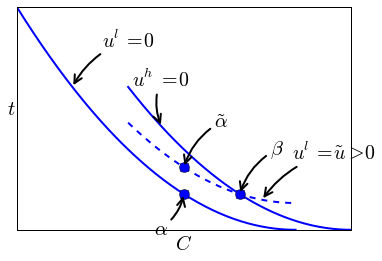

In [12]:
plt.clf()
plt.rcParams.update({'axes.labelsize': 20,'text.fontsize': 20, 'legend.fontsize': 20})
plt.xlabel(r"$C$",fontsize = 20)
plt.ylabel(r"$t$",fontsize = 20,rotation = 0)
IRh = [psi(C,beta_h) for C in rangeCh]
IRl = [psi(C,beta_l) for C in rangeCl]
rangeICl = linspace(1.0,2.5,200)
ICl = [psi(C,beta_l)+3.0/8.0 for C in rangeICl]
plt.plot(rangeCh,IRh,'-', color = 'b', linewidth = 2)
plt.plot(rangeCl,IRl,'-', color = 'b', linewidth = 2)
plt.plot(rangeICl,ICl,'--', color = 'b', linewidth = 2) # line style '--' draws a dashed line
plt.xticks((),[])
plt.yticks((),[])
alpha_point0 = plt.plot(1.5,psi(1.5,beta_l), 'ro')
plt.setp(alpha_point0, 'markersize', 10)
plt.setp(alpha_point0, 'markerfacecolor', 'b')
alpha_point = plt.plot(1.5,psi(1.5,beta_l)+3.0/8.0, 'ro')
plt.setp(alpha_point, 'markersize', 10)
plt.setp(alpha_point, 'markerfacecolor', 'b')
beta_point = plt.plot(2,psi(2,beta_h), 'ro')
plt.setp(beta_point, 'markersize', 10)
plt.setp(beta_point, 'markerfacecolor', 'b')


plt.annotate('$\\alpha$', xy=(1.5,psi(1.5,beta_l)),  xycoords='data',
              xytext=(-30, -40), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )
plt.annotate('$\\tilde{\\alpha}$', xy=(1.5,psi(1.5,beta_l)+3.0/8.0),  xycoords='data',
              xytext=(+30, +40), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )
plt.annotate('$u^l = 0$', xy=(0.5,psi(0.5,beta_l)),  xycoords='data',
              xytext=(30, 40), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )
plt.annotate('$u^l = \\tilde u>0$', xy=(2.2,psi(2.2,beta_l)+3.0/8.0),  xycoords='data',
              xytext=(30, 40), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )
plt.annotate('$\\beta$', xy=(2, psi(2,beta_h)),  xycoords='data',
              xytext=(30, 40), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )
plt.annotate('$u^h = 0$', xy=(1.3, psi(1.3,beta_h)),  xycoords='data',
              xytext=(-30, 40), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )
plt.savefig('Regulation_fig2.png')


e Implementing first best is only optimal if $\lambda =0$. That is, the planner does not worry about paying high rents ($\tilde u >0$) to $\beta^l$. If $\lambda > 0$, it becomes optimal to distort $\beta^h$'s contract. 

This can be seen as follows. By distorting $\beta^h$'s contract, we reduce welfare, but this is a second order effect (as we start from first best). By distorting this contract, we can reduce the rents we pay to $\beta^l$ which is a first order gain for $\lambda >0$.

f Start from the first best contracts. Reduce the rents that the planner pays to $\beta^l$ by moving $\beta^l$'s indifference curve downwards. This implies that $\beta^h$'s contract moves to the right and downward; i.e. it gets distorted with inefficiently high costs $C$ (due to inefficiently low effort $e$). By doing this, we reduce rents, without giving $\beta^l$ an incentive to mimic $\beta^h$. We keep $\beta^h$ on her IR constraint.

The trade off is: the further we reduce the rents paid to $\beta^l$ (move $\beta^l$'s indifference curve downwards), the more we have distort $\beta^h$'s effort and costs.

g See figure below with second best contracts $\hat \alpha, \hat \beta$.

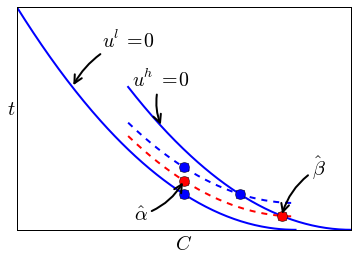

In [20]:
plt.clf()
plt.rcParams.update({'axes.labelsize': 20,'text.fontsize': 20, 'legend.fontsize': 20})
plt.xlabel(r"$C$",fontsize = 20)
plt.ylabel(r"$t$",fontsize = 20,rotation = 0)
IRh = [psi(C,beta_h) for C in rangeCh]
IRl = [psi(C,beta_l) for C in rangeCl]
rangeICl = linspace(1.0,2.5,200)
ICl = [psi(C,beta_l)+3.0/8.0 for C in rangeICl]
ICl2 = [psi(C,beta_l)+3.0/16.0 for C in rangeICl]
plt.plot(rangeCh,IRh,'-', color = 'b', linewidth = 2)
plt.plot(rangeCl,IRl,'-', color = 'b', linewidth = 2)
plt.plot(rangeICl,ICl,'--', color = 'b', linewidth = 2)
plt.plot(rangeICl,ICl2,'--', color = 'r', linewidth = 2)
plt.xticks((),[])
plt.yticks((),[])
alpha_point0 = plt.plot(1.5,psi(1.5,beta_l), 'ro')
plt.setp(alpha_point0, 'markersize', 10)
plt.setp(alpha_point0, 'markerfacecolor', 'b')
alpha_point = plt.plot(1.5,psi(1.5,beta_l)+3.0/8.0, 'ro')
plt.setp(alpha_point, 'markersize', 10)
plt.setp(alpha_point, 'markerfacecolor', 'b')
alpha_point1 = plt.plot(1.5,psi(1.5,beta_l)+3.0/16.0, 'ro')
plt.setp(alpha_point1, 'markersize', 10)
plt.setp(alpha_point1, 'markerfacecolor', 'r')
beta_point = plt.plot(2,psi(2,beta_h), 'ro')
plt.setp(beta_point, 'markersize', 10)
plt.setp(beta_point, 'markerfacecolor', 'b')
C_l = optimize.root(lambda x: psi(x,beta_l)+3.0/16.0-psi(x,beta_h) , 2.5).x[0]
beta_point2 = plt.plot(C_l,psi(C_l,beta_h), 'ro')
plt.setp(beta_point2, 'markersize', 10)
plt.setp(beta_point2, 'markerfacecolor', 'r')


plt.annotate('$\\hat{\\alpha}$', xy=(1.5,psi(1.5,beta_l)+3.0/16.0),  xycoords='data',
              xytext=(-50, -40), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )
plt.annotate('$u^l = 0$', xy=(0.5,psi(0.5,beta_l)),  xycoords='data',
              xytext=(30, 40), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )
plt.annotate('$\\hat{\\beta}$', xy=(C_l, psi(C_l,beta_h)),  xycoords='data',
              xytext=(30, 40), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )
plt.annotate('$u^h = 0$', xy=(1.3, psi(1.3,beta_h)),  xycoords='data',
              xytext=(-30, 40), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )
plt.savefig('Regulation_fig3.png')


h We keep $\beta^h$ on her IR constraint and hence $IR_h$ is binding. $\beta^l$ receives a rent and hence $IR_l$ is not binding.

We want to avoid that $\beta^l$ mimics $\beta^h$ and hence $IC_l$ is binding. Further, $\beta^h$ strictly prefers contract $\hat \beta$ above $\hat \alpha$ ($\hat \alpha$ lies below the indifference curve $u^h = 0$); hence $IC_h$ is not binding.

i The second best contracts are determined by the trade off between the rents paid to $\beta^l$ and the distorted effort of $\beta^h$. As the probability $\nu$ that a firm is $\beta^l$ increases, the rents become more important (in expected welfare) compared to $\beta^h$'s distortion.

Hence, in response to an increase in $\nu$, it is optimal to push $\beta^l$'s indifference curve downwards. This pushes contract $\hat \beta$ to the right, raising $C^h$.

Thus, the planner reduces $\beta^l$'s rents ($t^l$ falls, while $C^l$ is unchanged) and increases $\beta^h$'s effort distortion. 